In [38]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [39]:
# いかさまサイコロのとりうる値の集合
x_set = np.array([1, 2, 3, 4, 5, 6])

In [40]:
# いかさまサイコロの確率変数
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [41]:
# 確率変数Xが求まる
X = [x_set, f]

In [42]:
# 確率変数から各xkの確率pkを求める

# 確率p_kを求める
prob = np.array([f(x_k) for x_k in x_set]) 
# x_kとp_kの対応を辞書型にして表示
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

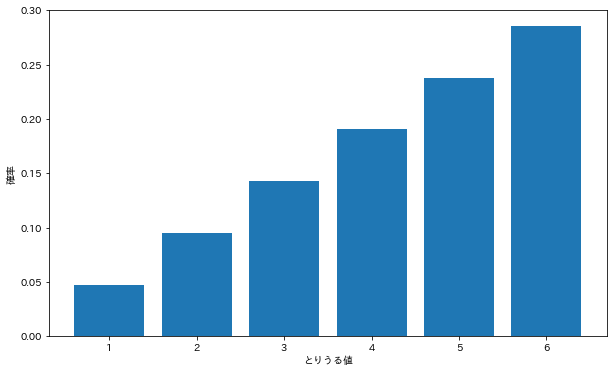

In [43]:
# とりうる値と確率の対応を棒グラフにして表示する
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('とりうる値')
ax.set_ylabel('確率')

plt.show()

In [44]:
# 確率がすべて0以上であるかチェック
np.all(prob>=0)

True

In [32]:
# 確率の総和が1であるかチェック
np.sum(prob)

0.9999999999999999

In [45]:
# 確率変数Xがx以下になるときの確率を返す関数を、
# 累積分布関数と呼ぶ
# np.sum()を使うと将来違う結果になるWarningが出てきたので、sum()
def F(x):
    return sum(f(x_k) for x_k in x_set if x_k<=x)

In [46]:
# 出目が3以下になる確率
F(3)

0.2857142857142857

In [50]:
# 2X + 3を確率変数Yとする
y_set = np.array([2*x_k+3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set]) 
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [54]:
# 離散型確率変数の場合、確率変数の平均は
# 確率変数のとりうる値とその確率の積の総和で求める事ができる
# →期待値
# また、期待値は無限回試行したときの実現値の平均である
 sum(x_k*f(x_k) for x_k in x_set)

4.333333333333333

In [55]:
# 上で求めた期待値が無限回試行したときの
# 実現値の平均に近いのか試してみる
# 100万回試行してみる(無限回試行の計算はできないので)
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.331108

In [56]:
# 離散型確率変数の期待値を求める式
def E(X, g=lambda x: x):
    x_set, f=X
    return sum(g(x_k)*f(x_k) for x_k in x_set)

In [58]:
# そのまま確率変数Xの期待値を求める
E(X)

4.333333333333333

In [61]:
# Y = 2X + 3の期待値を求める
E(X, g=lambda x: 2*x+3)

11.666666666666664

In [63]:
# 確率変数は線形性を持つ
# E(aX + b) = a*E(x) + b
2 * E(X) + 3

11.666666666666666

In [65]:
# いかさまサイコロの分散を求める
# 離散型確率変数の分散は、
# 各値から期待値を引いた物と確率の積の和
 sum(((x_k- E(X))**2)*f(x_k) for x_k in x_set)

2.2222222222222223

In [67]:
# 離散型確率変数の分散を求める一般式
def V(X, g=lambda x: x):
    x_set, f=X
    return sum(((x_k- E(X, g))**2)*f(x_k) for x_k in x_set)

In [68]:
# そのまま確率変数Xの分散を求める
V(X)

2.2222222222222223

In [75]:
# Y = 2X + 3の分散を求める
V(X, g=lambda x: 2*x+3)

55.99999999999997

In [74]:
# 分散の公式
# V(aX+b) = a^2V(X)
2**2*V(X)

8.88888888888889